In [33]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


# DATA

In [1]:
DATA_PATH = 'data/'

In [2]:
new_index_row = ['id','time','op_setting_1','op_setting_2','op_setting_3',
                 'sensor_1','sensor_2','sensor_3','sensor_4','sensor_5',
                 'sensor_6','sensor_7','sensor_8','sensor_9','sensor_10',
                 'sensor_11','sensor_12','sensor_13','sensor_14','sensor_15',
                 'sensor_16','sensor_17','sensor_18','sensor_19','sensor_20',
                 'sensor_21','sensor_22','sensor_23']

In [5]:
train_df = pd.read_csv(DATA_PATH + 'train_FD002.txt', names = new_index_row,sep=' ')
test_df = pd.read_csv(DATA_PATH + 'test_FD002.txt',names = new_index_row,sep=' ')

In [6]:
train_df = train_df.iloc[:,:-2]
test_df = test_df.iloc[:,:-2]

## Cluster

In [8]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto")
op_setting_df = train_df.iloc[:,2:5]
kmeans.fit(op_setting_df)
kmeans.cluster_centers_

array([[4.20029763e+01, 8.40485184e-01, 1.00000000e+02],
       [1.00029713e+01, 2.50495035e-01, 1.00000000e+02],
       [2.50030380e+01, 6.20501875e-01, 6.00000000e+01],
       [1.50451268e-03, 4.94343610e-04, 1.00000000e+02],
       [3.50030490e+01, 8.40500585e-01, 1.00000000e+02],
       [2.00029990e+01, 7.00515193e-01, 1.00000000e+02]])

In [9]:
train_df['Cluster_setting'] = kmeans.fit_predict(train_df)

In [10]:
train_df

id  time  op_setting_1  op_setting_2  op_setting_3  sensor_1  \
0        1     1       34.9983        0.8400         100.0    449.44   
1        1     2       41.9982        0.8408         100.0    445.00   
2        1     3       24.9988        0.6218          60.0    462.54   
3        1     4       42.0077        0.8416         100.0    445.00   
4        1     5       25.0005        0.6203          60.0    462.54   
...    ...   ...           ...           ...           ...       ...   
53754  260   312       20.0037        0.7000         100.0    491.19   
53755  260   313       10.0022        0.2510         100.0    489.05   
53756  260   314       25.0041        0.6200          60.0    462.54   
53757  260   315       25.0033        0.6220          60.0    462.54   
53758  260   316       35.0036        0.8400         100.0    449.44   

       sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_13  sensor_14  \
0        555.32   1358.61   1137.23      5.48  ...    2387.72    8048.56   
1        549.90   1353.22   1125.78      3.91  ...    2387.66    8072.30   
2        537.31   1256.76   1047.45      7.05  ...    2028.03    7864.87   
3        549.51   1354.03   1126.38      3.91  ...    2387.61    8068.66   
4        537.07   1257.71   1047.93      7.05  ...    2028.00    7861.23   
...         ...       ...       ...       ...  ...        ...        ...   
53754    608.79   1495.60   1269.51      9.35  ...    2389.02    8169.64   
53755    605.81   1514.32   1324.12     10.52  ...    2388.42    8245.36   
53756    537.48   1276.24   1057.92      7.05  ...    2030.33    7971.25   
53757    537.84   1272.95   1066.30      7.05  ...    2030.35    7972.47   
53758    556.64   1374.61   1145.52      5.48  ...    2390.38    8185.35   

       sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  \
0         9.3461       0.02        334       2223     100.00      14.73   
1         9.3774       0.02        330       2212     100.00      10.41   
2        10.8941       0.02        309       1915      84.93      14.08   
3         9.3528       0.02        329       2212     100.00      10.59   
4        10.8963       0.02        309       1915      84.93      14.13   
...          ...        ...        ...        ...        ...        ...   
53754     9.3035       0.03        369       2324     100.00      24.36   
53755     8.7586       0.03        374       2319     100.00      28.10   
53756    11.0657       0.02        310       1915      84.93      14.19   
53757    11.0537       0.02        311       1915      84.93      14.05   
53758     9.3998       0.02        338       2223     100.00      14.75   

       sensor_21  Cluster_setting  
0         8.8071                0  
1         6.2665                0  
2         8.6723                2  
3         6.4701                0  
4         8.5286                2  
...          ...              ...  
53754    14.5189                1  
53755    16.9454                1  
53756     8.5503                2  
53757     8.3729                2  
53758     8.8446                4  

[53759 rows x 27 columns]

## Scaled

In [122]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

In [123]:
train_setting = []
for i in range(6):
    train_setting_i = train_df[train_df['Cluster_setting']==i]
    train_setting.append(train_setting_i)

In [37]:
train_setting_robust_scaled = []
for setting_df in train_setting:
    robust_scaler.fit(setting_df.iloc[:,5:-1])
    df = pd.DataFrame(setting_df)
    sensor_columns = [col for col in df.columns if col.startswith('sensor')]
    df[sensor_columns] = robust_scaler.fit_transform(df[sensor_columns])
    train_setting_robust_scaled.append(df)

In [38]:
train_setting_minmax_scaled = []
for setting_df in train_setting:
    df = pd.DataFrame(setting_df)
    sensor_columns = [col for col in df.columns if col.startswith('sensor')]
    df[sensor_columns] = minmax_scaler.fit_transform(df[sensor_columns])
    train_setting_minmax_scaled.append(df)

In [124]:
train_setting_std_scaled = []
for setting_df in train_setting:
    df = pd.DataFrame(setting_df)
    sensor_columns = [col for col in df.columns if col.startswith('sensor')]
    df[sensor_columns] = std_scaler.fit_transform(df[sensor_columns])
    train_setting_std_scaled.append(df)

In [125]:
train_setting_minmax_scaled_df = pd.concat(train_setting_minmax_scaled, ignore_index=True)
train_setting_robust_scaled_df = pd.concat(train_setting_robust_scaled, ignore_index=True)
train_setting_std_scaled_df = pd.concat(train_setting_std_scaled, ignore_index=True)

In [126]:
train_setting_minmax_scaled_df = train_setting_minmax_scaled_df.sort_values(by=['id','time']).reset_index(drop=True)
train_setting_robust_scaled_df = train_setting_robust_scaled_df.sort_values(by=['id','time']).reset_index(drop=True)
train_setting_std_scaled_df = train_setting_std_scaled_df.sort_values(by=['id','time']).reset_index(drop=True)

# Health_condition

In [20]:
age = train_df.groupby(by='id').count().iloc[:,0].rename('Age')

In [26]:
# train_df = train_df.join(age,on='id')
train_df['RUL'] = train_df['Age'] - train_df['time']
train_df['health_condition'] = train_df['RUL']/train_df['Age']
train_df

id  time  op_setting_1  op_setting_2  op_setting_3  sensor_1  \
0        1     1       34.9983        0.8400         100.0    449.44   
1        1     2       41.9982        0.8408         100.0    445.00   
2        1     3       24.9988        0.6218          60.0    462.54   
3        1     4       42.0077        0.8416         100.0    445.00   
4        1     5       25.0005        0.6203          60.0    462.54   
...    ...   ...           ...           ...           ...       ...   
53754  260   312       20.0037        0.7000         100.0    491.19   
53755  260   313       10.0022        0.2510         100.0    489.05   
53756  260   314       25.0041        0.6200          60.0    462.54   
53757  260   315       25.0033        0.6220          60.0    462.54   
53758  260   316       35.0036        0.8400         100.0    449.44   

       sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_16  sensor_17  \
0        555.32   1358.61   1137.23      5.48  ...       0.02        334   
1        549.90   1353.22   1125.78      3.91  ...       0.02        330   
2        537.31   1256.76   1047.45      7.05  ...       0.02        309   
3        549.51   1354.03   1126.38      3.91  ...       0.02        329   
4        537.07   1257.71   1047.93      7.05  ...       0.02        309   
...         ...       ...       ...       ...  ...        ...        ...   
53754    608.79   1495.60   1269.51      9.35  ...       0.03        369   
53755    605.81   1514.32   1324.12     10.52  ...       0.03        374   
53756    537.48   1276.24   1057.92      7.05  ...       0.02        310   
53757    537.84   1272.95   1066.30      7.05  ...       0.02        311   
53758    556.64   1374.61   1145.52      5.48  ...       0.02        338   

       sensor_18  sensor_19  sensor_20  sensor_21  Cluster_setting  Age  RUL  \
0           2223     100.00      14.73     8.8071                0  149  148   
1           2212     100.00      10.41     6.2665                0  149  147   
2           1915      84.93      14.08     8.6723                2  149  146   
3           2212     100.00      10.59     6.4701                0  149  145   
4           1915      84.93      14.13     8.5286                2  149  144   
...          ...        ...        ...        ...              ...  ...  ...   
53754       2324     100.00      24.36    14.5189                1  316    4   
53755       2319     100.00      28.10    16.9454                1  316    3   
53756       1915      84.93      14.19     8.5503                2  316    2   
53757       1915      84.93      14.05     8.3729                2  316    1   
53758       2223     100.00      14.75     8.8446                4  316    0   

       health_condition  
0              0.993289  
1              0.986577  
2              0.979866  
3              0.973154  
4              0.966443  
...                 ...  
53754          0.012658  
53755          0.009494  
53756          0.006329  
53757          0.003165  
53758          0.000000  

[53759 rows x 30 columns]

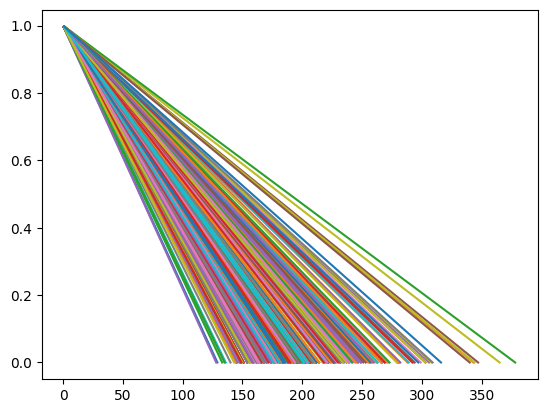

In [28]:
for i in range(261):
    train_id_df = train_df[train_df['id']==i]
    plt.plot(train_id_df['time'],train_id_df['health_condition'])

In [154]:
result_df = pd.DataFrame(columns=['id','time','Linear_minmax','Linear_robust','Linear_std','SVR_minmax','SVR_robust','SVR_std'])

In [ ]:
result_df['id'] = 

In [155]:
train_df

id  time  op_setting_1  op_setting_2  op_setting_3  sensor_1  \
0        1     1       34.9983        0.8400         100.0    449.44   
1        1     2       41.9982        0.8408         100.0    445.00   
2        1     3       24.9988        0.6218          60.0    462.54   
3        1     4       42.0077        0.8416         100.0    445.00   
4        1     5       25.0005        0.6203          60.0    462.54   
...    ...   ...           ...           ...           ...       ...   
53754  260   312       20.0037        0.7000         100.0    491.19   
53755  260   313       10.0022        0.2510         100.0    489.05   
53756  260   314       25.0041        0.6200          60.0    462.54   
53757  260   315       25.0033        0.6220          60.0    462.54   
53758  260   316       35.0036        0.8400         100.0    449.44   

       sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_16  sensor_17  \
0        555.32   1358.61   1137.23      5.48  ...       0.02        334   
1        549.90   1353.22   1125.78      3.91  ...       0.02        330   
2        537.31   1256.76   1047.45      7.05  ...       0.02        309   
3        549.51   1354.03   1126.38      3.91  ...       0.02        329   
4        537.07   1257.71   1047.93      7.05  ...       0.02        309   
...         ...       ...       ...       ...  ...        ...        ...   
53754    608.79   1495.60   1269.51      9.35  ...       0.03        369   
53755    605.81   1514.32   1324.12     10.52  ...       0.03        374   
53756    537.48   1276.24   1057.92      7.05  ...       0.02        310   
53757    537.84   1272.95   1066.30      7.05  ...       0.02        311   
53758    556.64   1374.61   1145.52      5.48  ...       0.02        338   

       sensor_18  sensor_19  sensor_20  sensor_21  Cluster_setting  Age  RUL  \
0           2223     100.00      14.73     8.8071                0  149  148   
1           2212     100.00      10.41     6.2665                0  149  147   
2           1915      84.93      14.08     8.6723                2  149  146   
3           2212     100.00      10.59     6.4701                0  149  145   
4           1915      84.93      14.13     8.5286                2  149  144   
...          ...        ...        ...        ...              ...  ...  ...   
53754       2324     100.00      24.36    14.5189                1  316    4   
53755       2319     100.00      28.10    16.9454                1  316    3   
53756       1915      84.93      14.19     8.5503                2  316    2   
53757       1915      84.93      14.05     8.3729                2  316    1   
53758       2223     100.00      14.75     8.8446                4  316    0   

       health_condition  
0              0.993289  
1              0.986577  
2              0.979866  
3              0.973154  
4              0.966443  
...                 ...  
53754          0.012658  
53755          0.009494  
53756          0.006329  
53757          0.003165  
53758          0.000000  

[53759 rows x 30 columns]

# Linear Regression

**With 8 best sensor**

In [53]:
best_sensor = np.array([1,2,3,10,11,12,14,16]) + 1
best_sensor

array([ 2,  3,  4, 11, 12, 13, 15, 17])

In [54]:
best_sensor_iloc = best_sensor + 5

## minmax scaler

In [152]:
X_minmax = train_setting_minmax_scaled_df.iloc[:,best_sensor_iloc]
y_minmax = train_setting_minmax_scaled_df.iloc[:,-1]
reg = LinearRegression().fit(X_minmax, y_minmax)

In [153]:
reg.intercept_,reg.coef_

(1.1024998872924145,
 array([-0.45018648, -0.80702272,  0.31286599,  0.14235174, -0.31743744,
         0.15661283, -0.19304999, -0.22536067]))

In [58]:
y_minmax_pred = reg.predict(X_minmax)

In [75]:
train_id_df.iloc[:,best_sensor_iloc]

sensor_3  sensor_4  sensor_5  sensor_12  sensor_13  sensor_14  sensor_16  \
624   1347.88   1124.82      3.91     130.68    2388.00    8085.64       0.02   
625   1587.73   1401.76     14.62     521.95    2388.03    8133.76       0.03   
626   1481.67   1256.13      9.35     314.98    2388.06    8070.56       0.02   
627   1351.14   1117.61      3.91     130.36    2388.08    8086.42       0.02   
628   1349.13   1115.36      3.91     130.34    2387.93    8086.80       0.02   
..        ...       ...       ...        ...        ...        ...        ...   
854   1597.86   1420.69     14.62     520.35    2388.16    8210.28       0.03   
855   1513.54   1323.65     10.52     370.41    2388.38    8207.20       0.03   
856   1513.68   1331.83     10.52     370.66    2388.44    8209.77       0.03   
857   1515.20   1321.56     10.52     370.80    2388.38    8210.65       0.03   
858   1605.86   1428.21     14.62     520.25    2388.17    8215.14       0.03   

     sensor_18  
624       2212  
625       2388  
626       2324  
627       2212  
628       2212  
..         ...  
854       2388  
855       2319  
856       2319  
857       2319  
858       2388  

[235 rows x 8 columns]

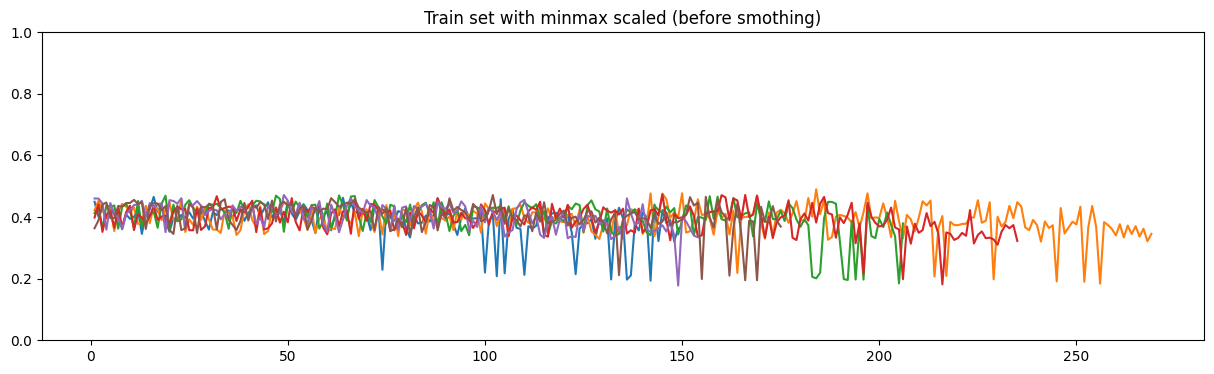

In [135]:
plt.figure(figsize=(15,4))
for i in range(1,7):
    train_id_df = train_setting_minmax_scaled_df[train_setting_minmax_scaled_df['id']==i]
    y_minmax_pred = reg.predict(train_id_df.iloc[:,best_sensor_iloc])
    plt.plot(train_id_df['time'],y_minmax_pred)
    plt.ylim(0, 1)
plt.title('Train set with minmax scaled (before smothing)');

**Rolling**

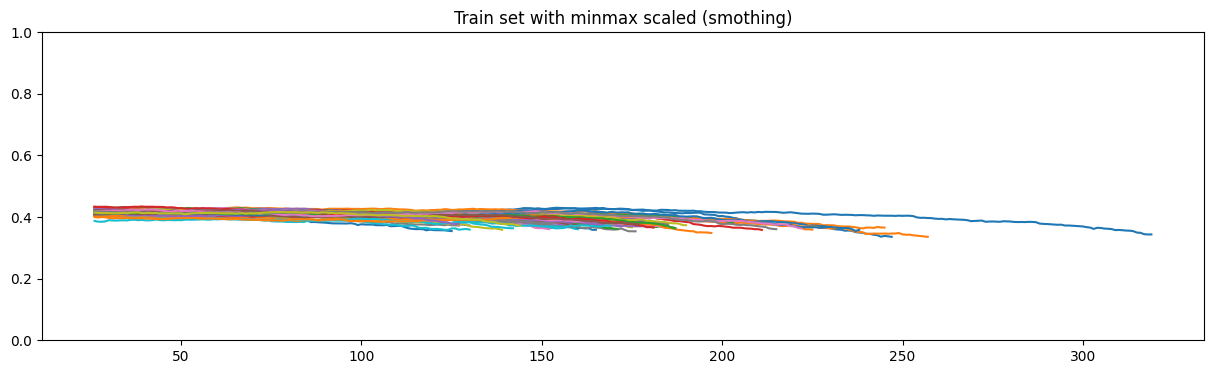

In [139]:
plt.figure(figsize=(15,4))
for i in range(1,50):
    train_id_df = train_setting_minmax_scaled_df[train_setting_minmax_scaled_df['id']==i]
    y_minmax_pred = reg.predict(train_id_df.iloc[:,best_sensor_iloc])
    y_minmax_pred = pd.Series(y_minmax_pred).rolling(window=50,center=True).mean().to_numpy()
    plt.plot(train_id_df['time'],y_minmax_pred)
    plt.ylim(0, 1)
plt.title('Train set with minmax scaled (smothing)');

## Robust scaler

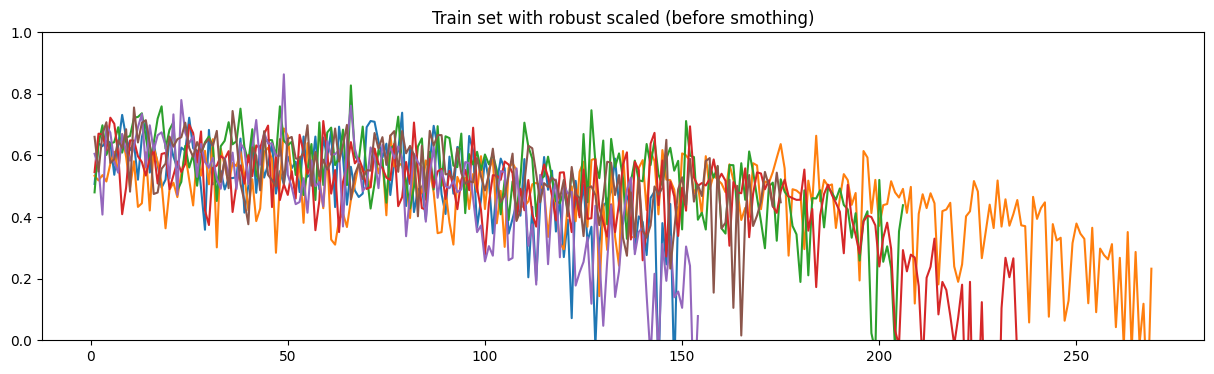

In [142]:
X_robust = train_setting_robust_scaled_df.iloc[:,best_sensor_iloc]
y_robust = train_setting_robust_scaled_df.iloc[:,-1]
reg = LinearRegression().fit(X_robust, y_robust)


y_robust_pred = reg.predict(X_robust)

train_setting_robust_scaled_df

train_id_df.iloc[:,best_sensor_iloc]

plt.figure(figsize=(15,4))
for i in range(1,7):
    train_id_df = train_setting_robust_scaled_df[train_setting_robust_scaled_df['id']==i]
    y_robust_pred = reg.predict(train_id_df.iloc[:,best_sensor_iloc])
    plt.plot(train_id_df['time'],y_robust_pred)
    plt.ylim(0, 1)
plt.title('Train set with robust scaled (before smothing)');

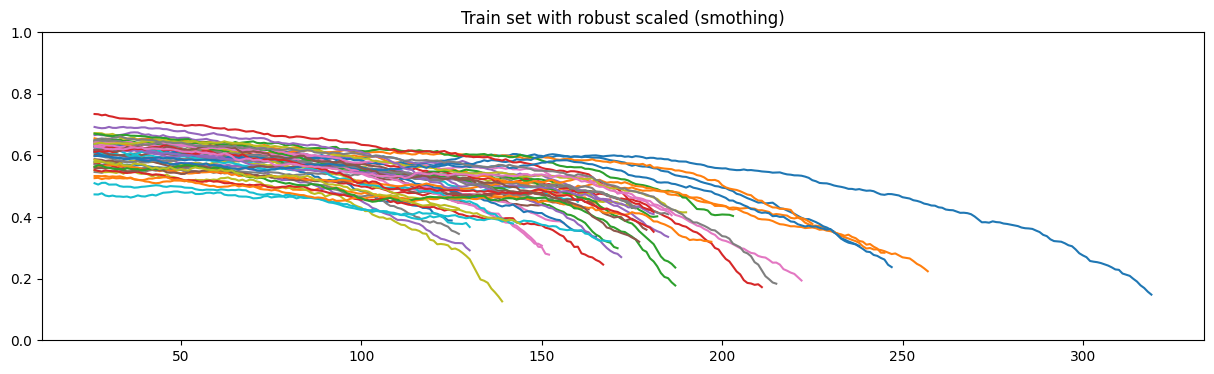

In [143]:
plt.figure(figsize=(15,4))

for i in range(1,50):
    train_id_df = train_setting_robust_scaled_df[train_setting_robust_scaled_df['id']==i]
    y_robust_pred = reg.predict(train_id_df.iloc[:,best_sensor_iloc])
    y_robust_pred = pd.Series(y_robust_pred).rolling(window=50,center=True).mean().to_numpy()
    plt.plot(train_id_df['time'],y_robust_pred)
    plt.ylim(0, 1)
plt.title('Train set with robust scaled (smothing)');

## Std scaler

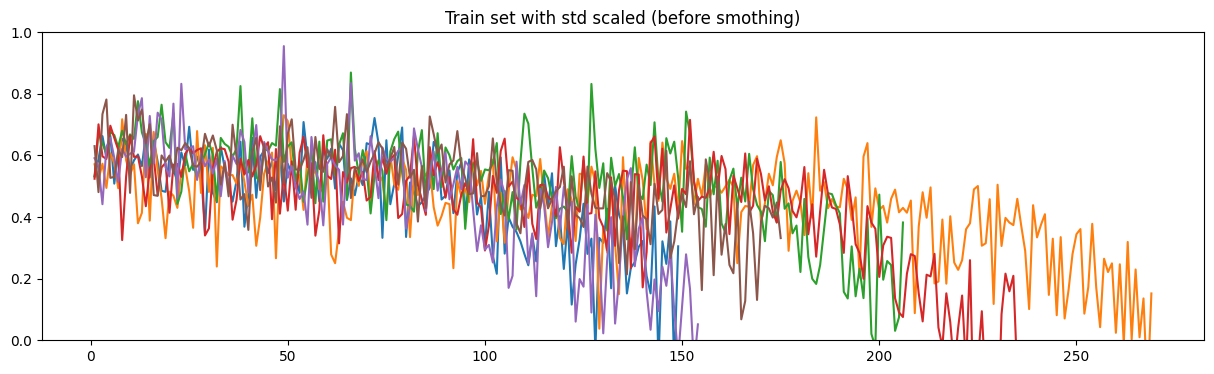

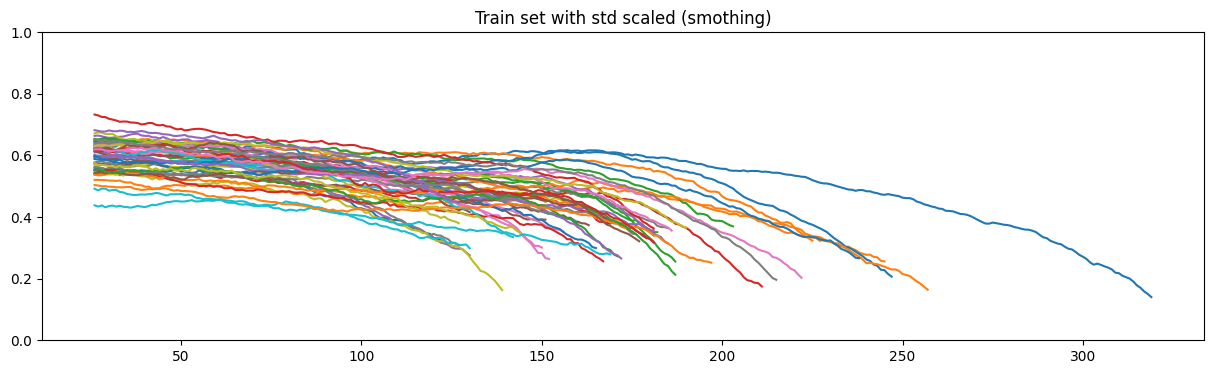

In [144]:
X_std = train_setting_std_scaled_df.iloc[:,best_sensor_iloc]
y_std = train_setting_std_scaled_df.iloc[:,-1]
reg = LinearRegression().fit(X_std, y_std)


y_std_pred = reg.predict(X_std)


train_id_df.iloc[:,best_sensor_iloc]

plt.figure(figsize=(15,4))
for i in range(1,7):
    train_id_df = train_setting_std_scaled_df[train_setting_std_scaled_df['id']==i]
    y_std_pred = reg.predict(train_id_df.iloc[:,best_sensor_iloc])
    plt.plot(train_id_df['time'],y_std_pred)
    plt.ylim(0, 1)
plt.title('Train set with std scaled (before smothing)');
plt.figure(figsize=(15,4))

for i in range(1,50):
    train_id_df = train_setting_std_scaled_df[train_setting_std_scaled_df['id']==i]
    y_std_pred = reg.predict(train_id_df.iloc[:,best_sensor_iloc])
    y_std_pred = pd.Series(y_std_pred).rolling(window=50,center=True).mean().to_numpy()
    plt.plot(train_id_df['time'],y_std_pred)
    plt.ylim(0, 1)
plt.title('Train set with std scaled (smothing)');

# SVR (poly kernel)

In [163]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

In [246]:
def plot_predict_trained_model(model): 
    fig,axs = plt.subplots(2,1,figsize=(15,8))
    for i in range(1,50):
        train_id_df = train_setting_std_scaled_df[train_setting_std_scaled_df['id']==i]
        y_std_pred = model.predict(train_id_df.iloc[:,best_sensor_iloc])
        y_std_pred_smothed = pd.Series(y_std_pred).rolling(window=50,center=True).mean().to_numpy()
        
        axs[0].plot(train_id_df['time'],y_std_pred)
        axs[0].set_title('Unsmothed')
#         axs[0].set_ylim(0,1)
        axs[1].plot(train_id_df['time'],y_std_pred_smothed)
        axs[1].set_title('Smothed')
        axs[1].set_ylim(0,1)


## Minmax

In [183]:
X = train_setting_minmax_scaled_df.iloc[:,best_sensor_iloc]
y = train_setting_minmax_scaled_df.iloc[:,-1]
svr = SVR(kernel='poly',C=1,epsilon=0.2,degree=2).fit(X, y)

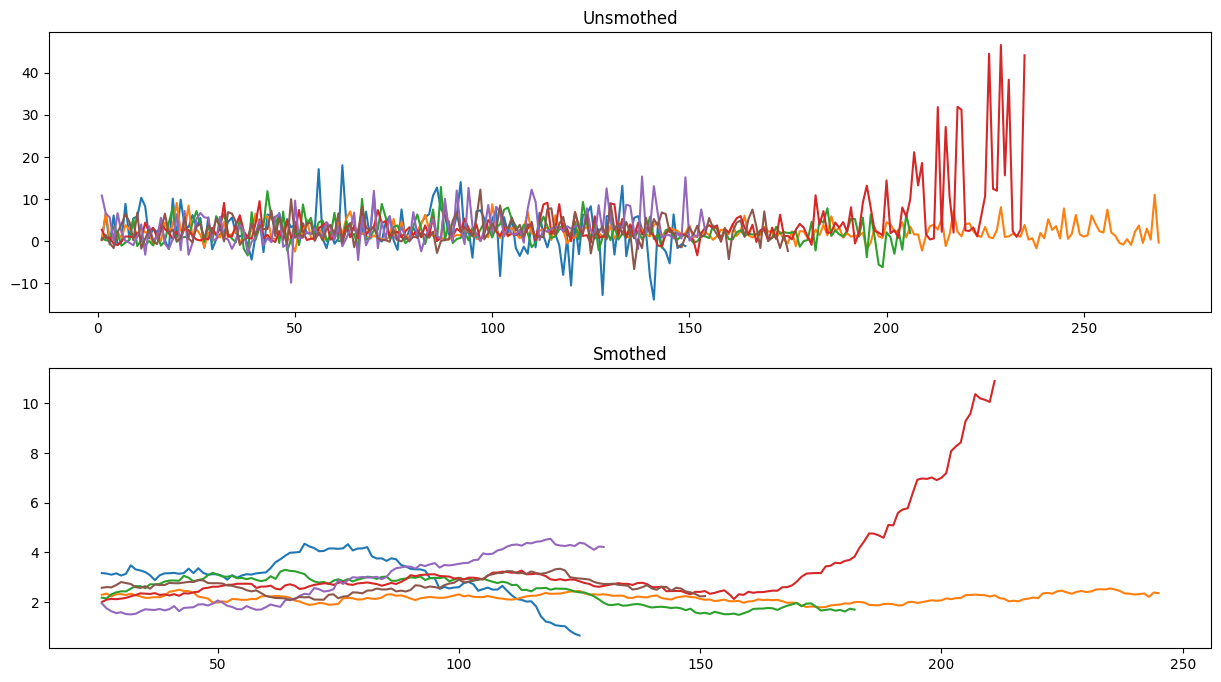

In [188]:
plot_predict_trained_svr(svr)

In [202]:
X = train_setting_minmax_scaled_df.iloc[:,best_sensor_iloc]
y = train_setting_minmax_scaled_df.iloc[:,-1]
svr = SVR(kernel='poly',C=0.5,epsilon=0.01,degree=2).fit(X, y)

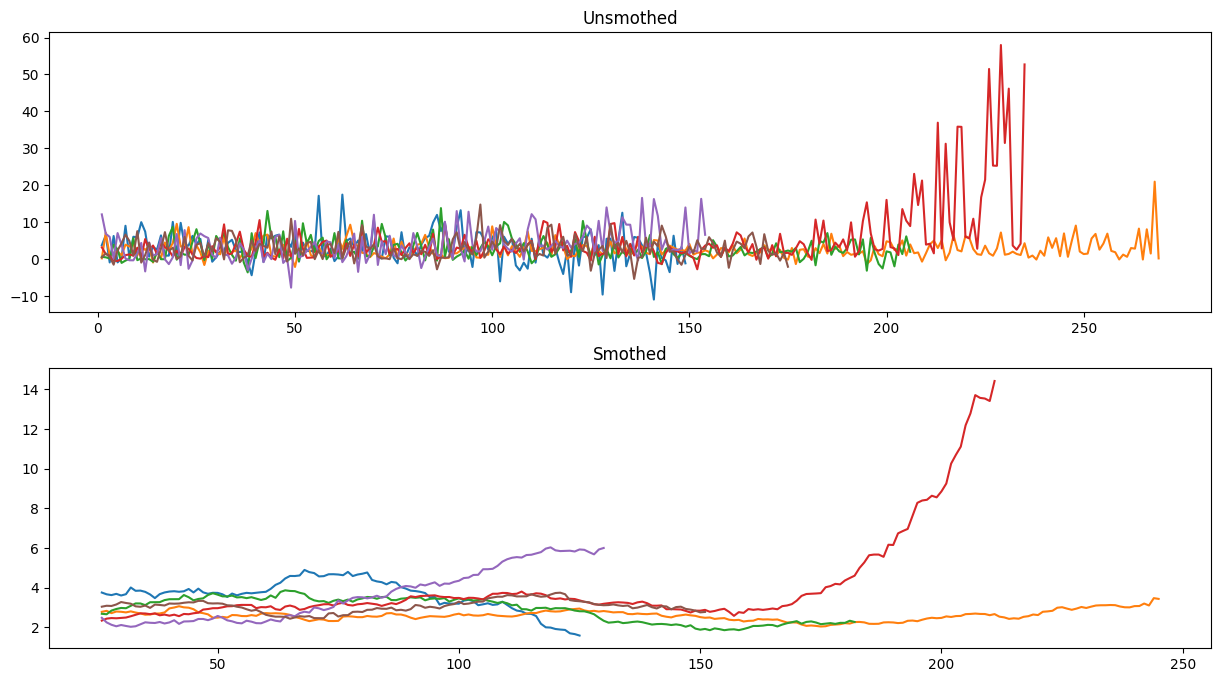

In [203]:
plot_predict_trained_svr(svr)

## robust

In [249]:
X = train_setting_robust_scaled_df.iloc[:,best_sensor_iloc]
y = train_setting_robust_scaled_df.iloc[:,-1]
svr = SVR(kernel='poly',C=0.5,epsilon=0.01,degree=2).fit(X, y)

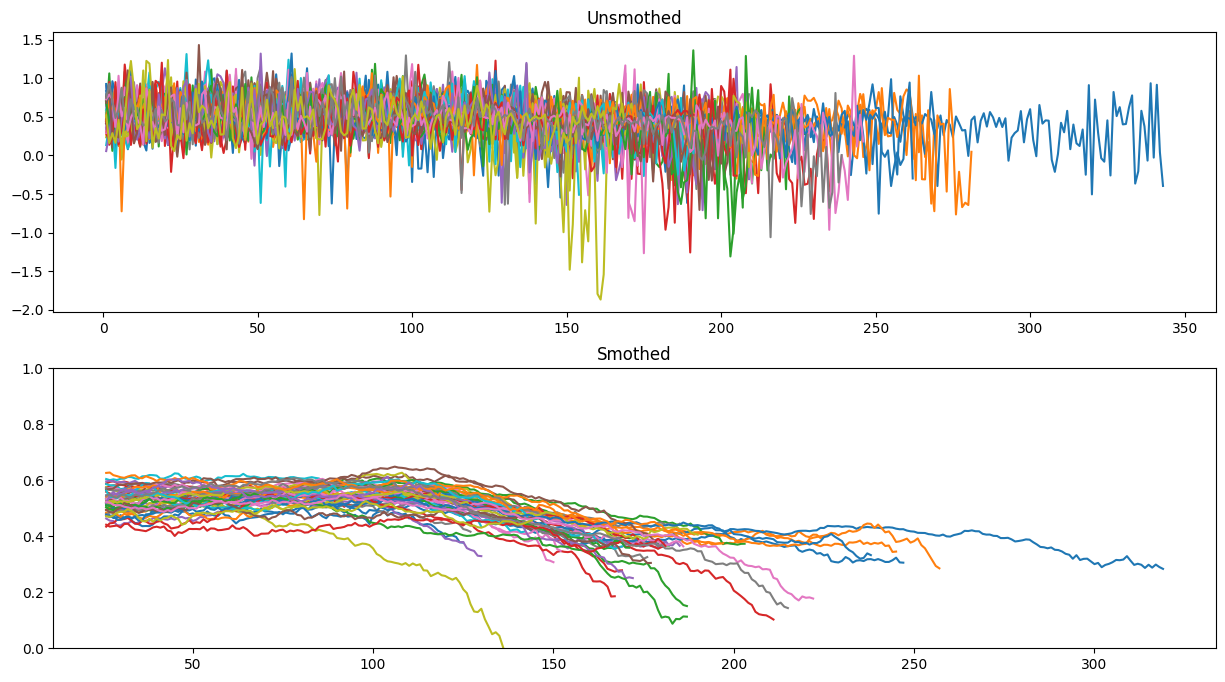

In [250]:
plot_predict_trained_model(svr)

## Std

In [242]:
X = train_setting_std_scaled_df.iloc[:,best_sensor_iloc]
y = train_setting_std_scaled_df.iloc[:,-1]
svr = SVR(kernel='poly',C=0.5,epsilon=0.01,degree=2).fit(X, y)

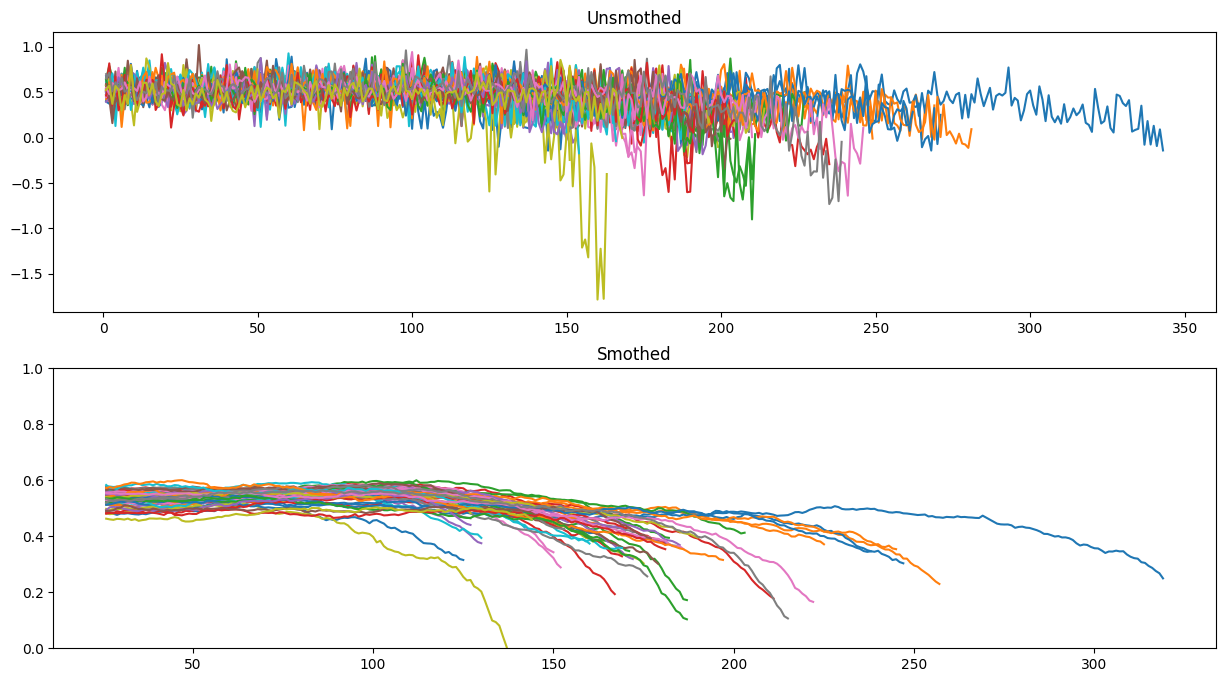

In [248]:
plot_predict_trained_model(svr)

# PolynomialFeatures

In [205]:
from sklearn.preprocessing import PolynomialFeatures

## Minmax

In [225]:
X = train_setting_minmax_scaled_df.iloc[:,best_sensor_iloc]
y = train_setting_minmax_scaled_df.iloc[:,-1]
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [227]:
def plot_predict_trained_poly(model): 
    fig,axs = plt.subplots(2,1,figsize=(15,8))
    for i in range(1,50):
        train_id_df = train_setting_std_scaled_df[train_setting_std_scaled_df['id']==i]
        X = train_id_df.iloc[:,best_sensor_iloc]
        X_poly = poly.fit_transform(X)
        y_std_pred = model.predict(X_poly)
        y_std_pred_smothed = pd.Series(y_std_pred).rolling(window=50,center=True).mean().to_numpy()
        
        axs[0].plot(train_id_df['time'],y_std_pred)
        axs[0].set_title('Unsmothed')
#         axs[0].set_ylim(0,1)
        axs[1].plot(train_id_df['time'],y_std_pred_smothed)
        axs[1].set_title('Smothed')
#         axs[1].set_ylim(0,1)
    

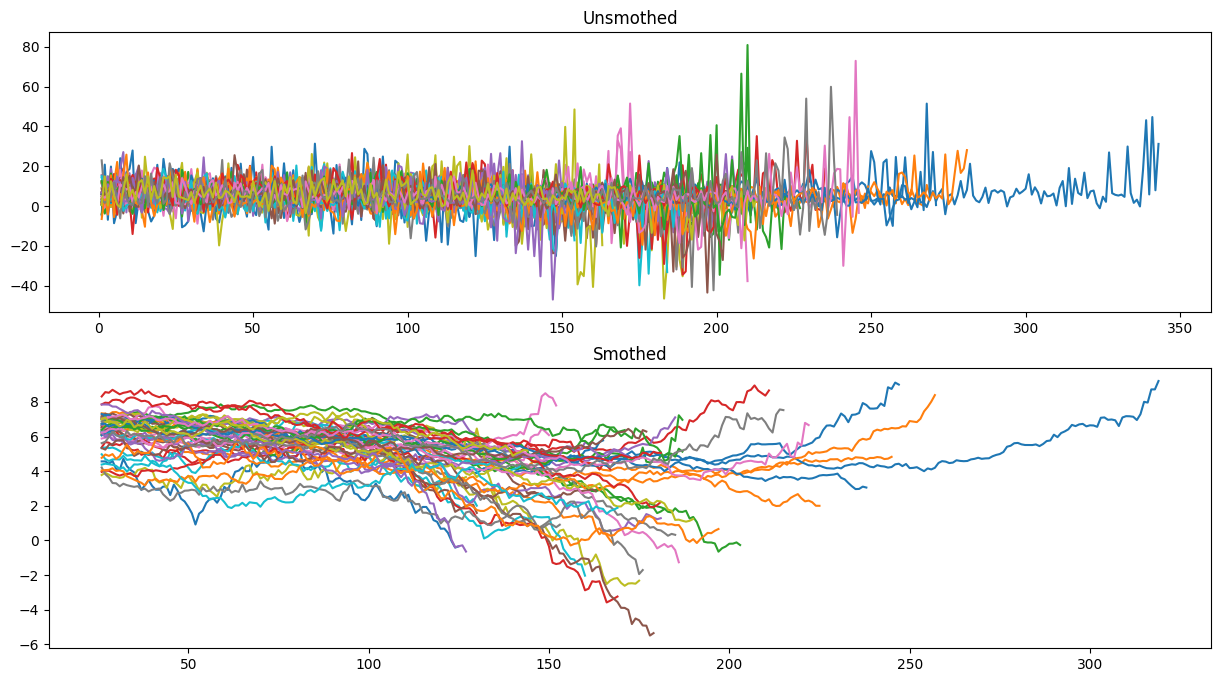

In [221]:
plot_predict_trained_poly(poly_reg_model)

## Robust 

In [232]:
X = train_setting_robust_scaled_df.iloc[:,best_sensor_iloc]
y = train_setting_robust_scaled_df.iloc[:,-1]
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [233]:
def plot_predict_trained_poly(model): 
    fig,axs = plt.subplots(2,1,figsize=(15,8))
    for i in range(1,50):
        train_id_df = train_setting_std_scaled_df[train_setting_std_scaled_df['id']==i]
        X = train_id_df.iloc[:,best_sensor_iloc]
        X_poly = poly.fit_transform(X)
        y_std_pred = model.predict(X_poly)
        y_std_pred_smothed = pd.Series(y_std_pred).rolling(window=50,center=True).mean().to_numpy()
        
        axs[0].plot(train_id_df['time'],y_std_pred)
        axs[0].set_title('Unsmothed')
#         axs[0].set_ylim(0,1)
        axs[1].plot(train_id_df['time'],y_std_pred_smothed)
        axs[1].set_title('Smothed')
#         axs[1].set_ylim(0,1)
    

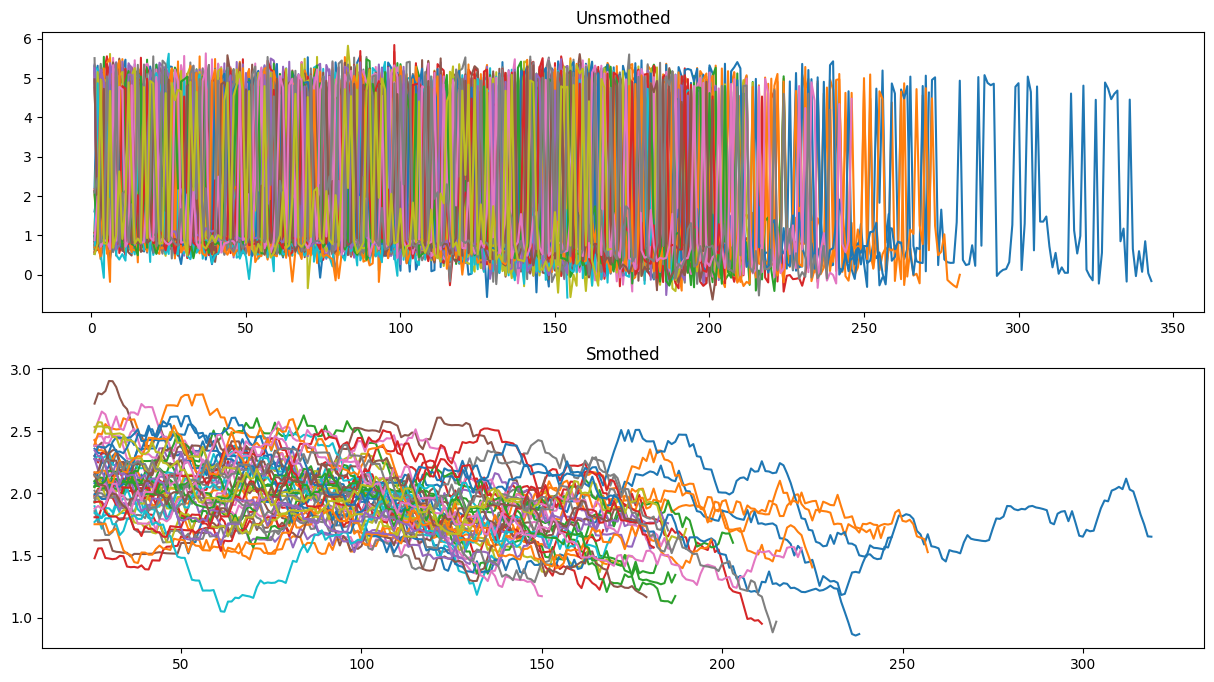

In [234]:
plot_predict_trained_poly(poly_reg_model)

## Std

In [235]:
X = train_setting_std_scaled_df.iloc[:,best_sensor_iloc]
y = train_setting_std_scaled_df.iloc[:,-1]
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [238]:
def plot_predict_trained_poly(model): 
    fig,axs = plt.subplots(2,1,figsize=(15,8))
    for i in range(1,50):
        train_id_df = train_setting_std_scaled_df[train_setting_std_scaled_df['id']==i]
        X = train_id_df.iloc[:,best_sensor_iloc]
        X_poly = poly.fit_transform(X)
        y_std_pred = model.predict(X_poly)
        y_std_pred_smothed = pd.Series(y_std_pred).rolling(window=50,center=True).mean().to_numpy()
        
        axs[0].plot(train_id_df['time'],y_std_pred)
        axs[0].set_title('Unsmothed')
        axs[0].set_ylim(0,1)
        axs[1].plot(train_id_df['time'],y_std_pred_smothed)
        axs[1].set_title('Smothed')
        axs[1].set_ylim(0,1)
    

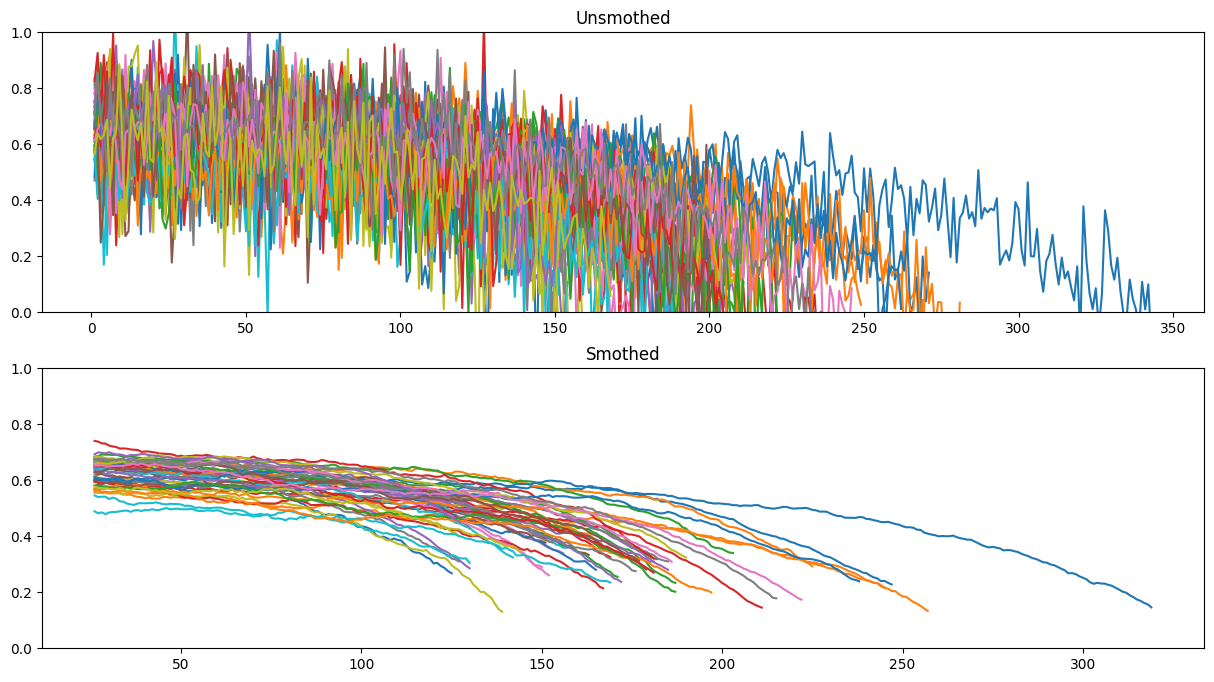

In [239]:
plot_predict_trained_poly(poly_reg_model)

# Conclusion

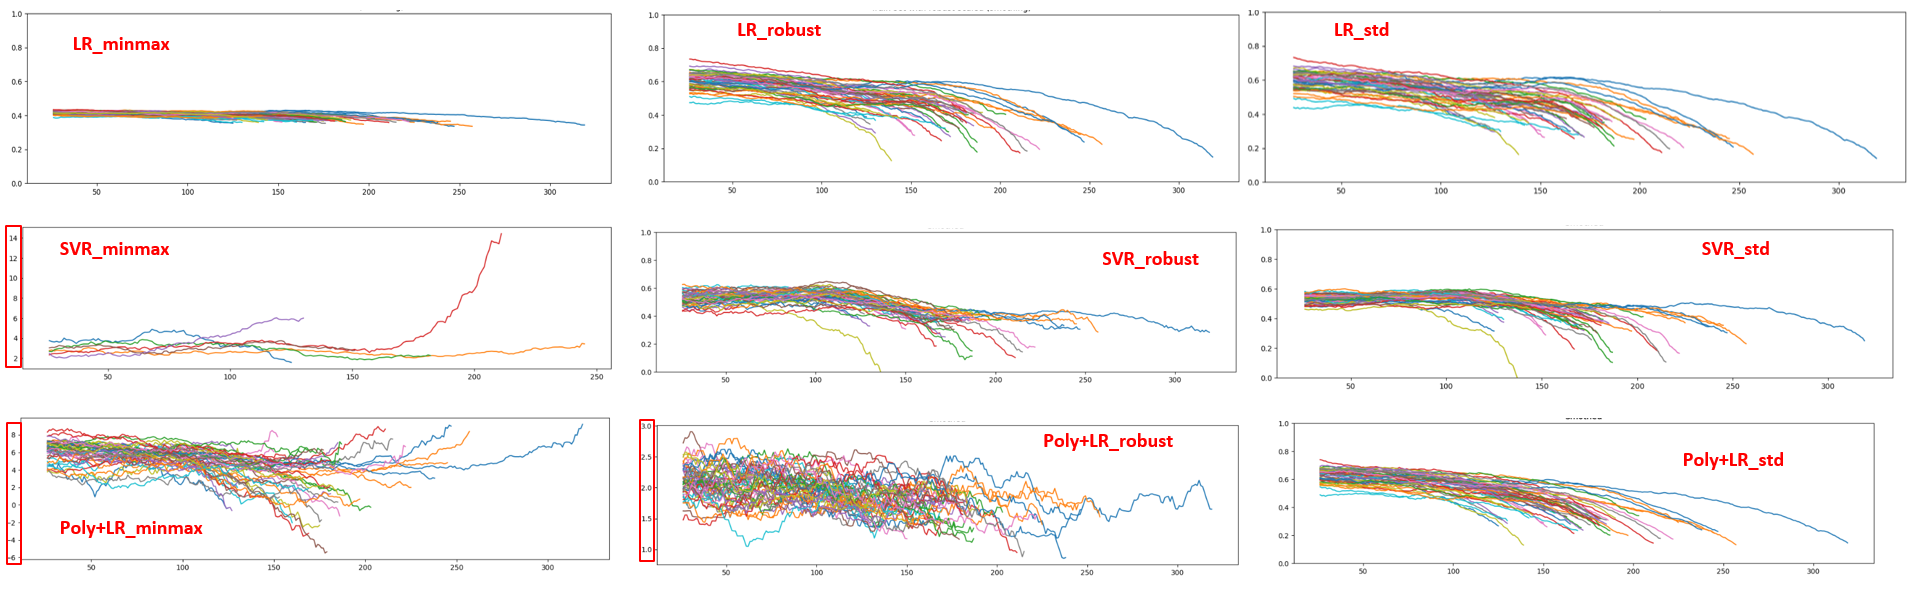

In [251]:
train_df

id  time  op_setting_1  op_setting_2  op_setting_3  sensor_1  \
0        1     1       34.9983        0.8400         100.0    449.44   
1        1     2       41.9982        0.8408         100.0    445.00   
2        1     3       24.9988        0.6218          60.0    462.54   
3        1     4       42.0077        0.8416         100.0    445.00   
4        1     5       25.0005        0.6203          60.0    462.54   
...    ...   ...           ...           ...           ...       ...   
53754  260   312       20.0037        0.7000         100.0    491.19   
53755  260   313       10.0022        0.2510         100.0    489.05   
53756  260   314       25.0041        0.6200          60.0    462.54   
53757  260   315       25.0033        0.6220          60.0    462.54   
53758  260   316       35.0036        0.8400         100.0    449.44   

       sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_16  sensor_17  \
0        555.32   1358.61   1137.23      5.48  ...       0.02        334   
1        549.90   1353.22   1125.78      3.91  ...       0.02        330   
2        537.31   1256.76   1047.45      7.05  ...       0.02        309   
3        549.51   1354.03   1126.38      3.91  ...       0.02        329   
4        537.07   1257.71   1047.93      7.05  ...       0.02        309   
...         ...       ...       ...       ...  ...        ...        ...   
53754    608.79   1495.60   1269.51      9.35  ...       0.03        369   
53755    605.81   1514.32   1324.12     10.52  ...       0.03        374   
53756    537.48   1276.24   1057.92      7.05  ...       0.02        310   
53757    537.84   1272.95   1066.30      7.05  ...       0.02        311   
53758    556.64   1374.61   1145.52      5.48  ...       0.02        338   

       sensor_18  sensor_19  sensor_20  sensor_21  Cluster_setting  Age  RUL  \
0           2223     100.00      14.73     8.8071                0  149  148   
1           2212     100.00      10.41     6.2665                0  149  147   
2           1915      84.93      14.08     8.6723                2  149  146   
3           2212     100.00      10.59     6.4701                0  149  145   
4           1915      84.93      14.13     8.5286                2  149  144   
...          ...        ...        ...        ...              ...  ...  ...   
53754       2324     100.00      24.36    14.5189                1  316    4   
53755       2319     100.00      28.10    16.9454                1  316    3   
53756       1915      84.93      14.19     8.5503                2  316    2   
53757       1915      84.93      14.05     8.3729                2  316    1   
53758       2223     100.00      14.75     8.8446                4  316    0   

       health_condition  
0              0.993289  
1              0.986577  
2              0.979866  
3              0.973154  
4              0.966443  
...                 ...  
53754          0.012658  
53755          0.009494  
53756          0.006329  
53757          0.003165  
53758          0.000000  

[53759 rows x 30 columns]

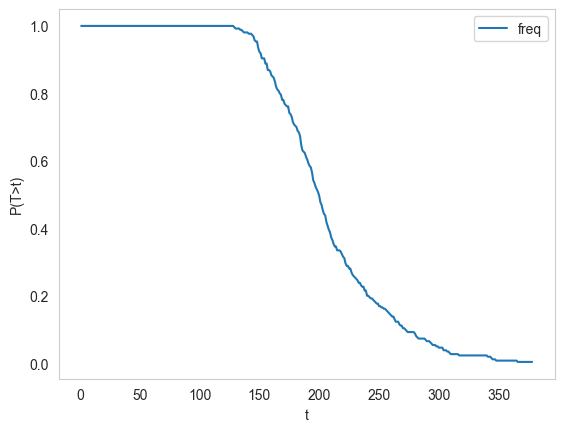

In [252]:
def log_logistic(x,alpha,beta):
    above = (beta/alpha)*((x/alpha)**(beta-1))
    beneath = (1+(x/alpha)**beta)**2
    return above/beneath

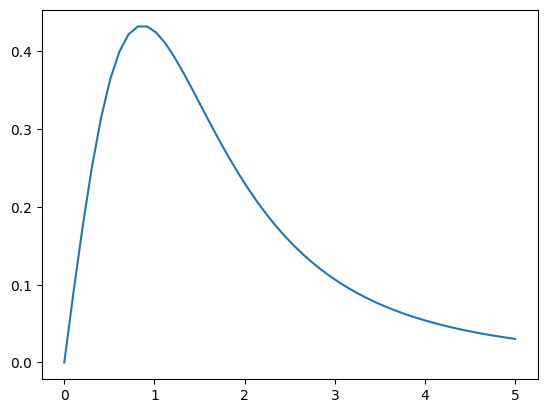

In [268]:
x = np.linspace(0,5)
plt.plot(x,log_logistic(x,1.5,2))

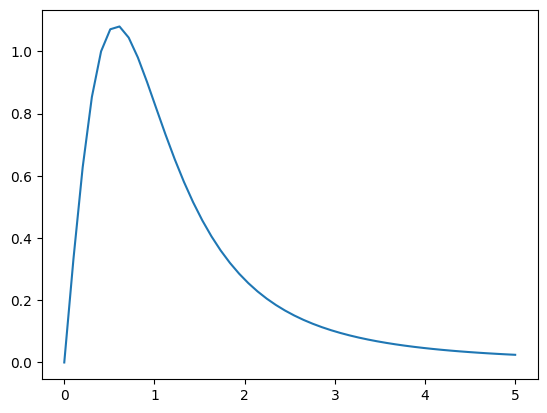

In [258]:
x = np.linspace(0,5)
plt.plot(x,log_logistic(x,1,2)/0.6)